In [0]:
import numpy as np 
import pandas as pd

In [0]:
from google.colab import files
import io

In [0]:
uploaded = files.upload()

Saving hpq.us.txt to hpq.us.txt


In [0]:
df = pd.read_csv(io.BytesIO(uploaded['hpq.us.txt']),usecols=['Date','Open','High','Low','Close'])

In [0]:
df.Date.describe()

count          12075
unique         12075
top       1982-08-26
freq               1
Name: Date, dtype: object

In [0]:
df_comp = df.copy()
df_comp.Date.describe()

count          12075
unique         12075
top       1982-08-26
freq               1
Name: Date, dtype: object

In [0]:
df_comp.head()

,Date,Open,High,Low,Close
0,1970-01-02,0.30627,0.30627,0.30627,0.30627
1,1970-01-05,0.30627,0.31768,0.30627,0.31385
2,1970-01-06,0.31385,0.31385,0.30996,0.30996
3,1970-01-07,0.31385,0.31385,0.31385,0.31385
4,1970-01-08,0.31385,0.31768,0.31385,0.31385


# Data Pre Processing

In [0]:
df_comp.Date = pd.to_datetime(df_comp.Date, dayfirst = True)
df_comp.set_index("Date", inplace=True)
df_comp=df_comp.asfreq('b')
df_comp=df_comp.fillna(method='ffill')

# Splitting data into trainign and testing set


In [0]:
size = int(len(df_comp)*0.75)
df_train = df_comp.iloc[:size]
df_test = df_comp.iloc[size:]
df_test.tail()

,Open,High,Low,Close
Date,,,,
2017-11-06,21.47,21.53,21.38,21.44
2017-11-07,21.47,21.47,21.32,21.38
2017-11-08,21.34,21.47,21.24,21.42
2017-11-09,21.27,21.40,21.15,21.34
2017-11-10,21.25,21.31,21.14,21.23


# Splitting data

In [0]:
from pandas_datareader import data
import matplotlib.pyplot as plt
import pandas as pd
import datetime as dt
import urllib.request, json
import os
import numpy as np
import tensorflow as tf # This code has been tested with TensorFlow 1.6
from sklearn.preprocessing import MinMaxScaler

In [0]:
train_data = df_comp[:11000]
test_data = df_comp[11000:]

In [0]:
size = int(len(df_comp)*0.75)
df_train = df_comp.iloc[:size]
df_test = df_comp.iloc[size:]
df_test.tail()

,Open,High,Low,Close
Date,,,,
2017-11-06,21.47,21.53,21.38,21.44
2017-11-07,21.47,21.47,21.32,21.38
2017-11-08,21.34,21.47,21.24,21.42
2017-11-09,21.27,21.40,21.15,21.34
2017-11-10,21.25,21.31,21.14,21.23


MIN -MAX scaling 


In [0]:
from sklearn.preprocessing import MinMaxScaler
feature__scaler = MinMaxScaler()
df_train = df_train.Close.reshape(-1,1)
df_test = df_test.Close.reshape(-1,1)

AttributeError: ignored

In [0]:
type(df_train)

pandas.core.frame.DataFrame

## Time-Sereis Cross Validation 

In [0]:
df_comp = df_comp.asfreq('b')

In [0]:
df_comp = df_comp.fillna(method="ffill")

In [0]:
df_comp.isna().sum()  

Open     0
High     0
Low      0
Close    0
dtype: int64

## Creating reurns

In [0]:
df_returns = df_comp.copy()

In [0]:
df_returns['Close'] = df_returns.pct_change(1).mul(100)

In [0]:
df_returns.head()

,Open,High,Low,Close
Date,,,,
1970-01-02,0.30627,0.30627,0.30627,NaN
1970-01-05,0.30627,0.31768,0.30627,0.00000
1970-01-06,0.31385,0.31385,0.30996,2.47494
1970-01-07,0.31385,0.31385,0.31385,0.00000
1970-01-08,0.31385,0.31768,0.31385,0.00000


In [0]:
df['returns'] = df.market_value.pct_change(1).mul(100)
df = df.iloc[1:] 

In [0]:
import statsmodels.graphics.tsaplots as sgt
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


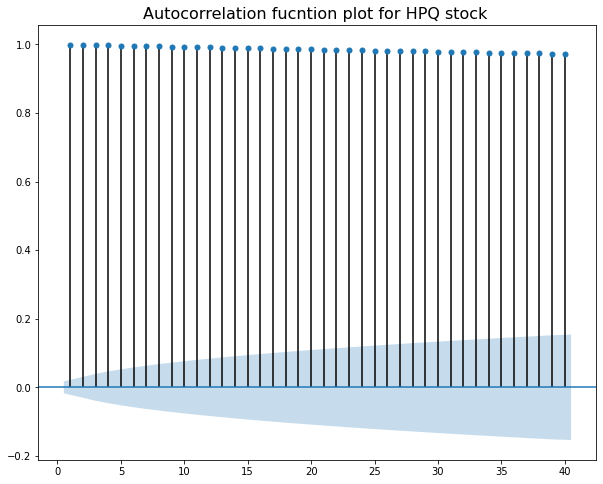

In [0]:
sgt.plot_acf(df_comp.Close, lags=40 , zero=False )
plt.title("Autocorrelation fucntion plot for HPQ stock ", size =16)
fig = plt.gcf()
fig.set_size_inches(10, 8)
plt.show()

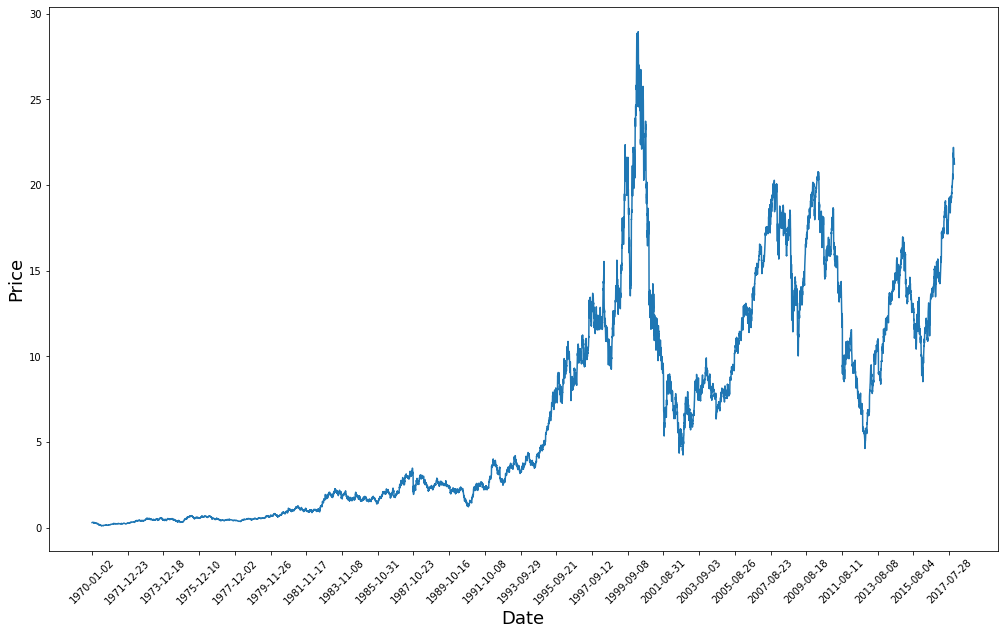

In [0]:
plt.figure(figsize = (17,10))
plt.plot(range(df.shape[0]),(df['Low']+df['High'])/2.0)
plt.xticks(range(0,df.shape[0],500),df['Date'].loc[::500],rotation=45)
plt.xlabel('Date',fontsize=18)
plt.ylabel('Price',fontsize=18)
plt.show()

In [0]:
plt.figure(figsize = (,10))
plt.plot(range(df.shape[0]),(df['Close']))
plt.xticks(range(0,df.shape[0],500),df['Date'].loc[::500],rotation=45)
plt.xlabel('Date',fontsize=18)
plt.ylabel('Price',fontsize=18)
plt.show()

SyntaxError: ignored

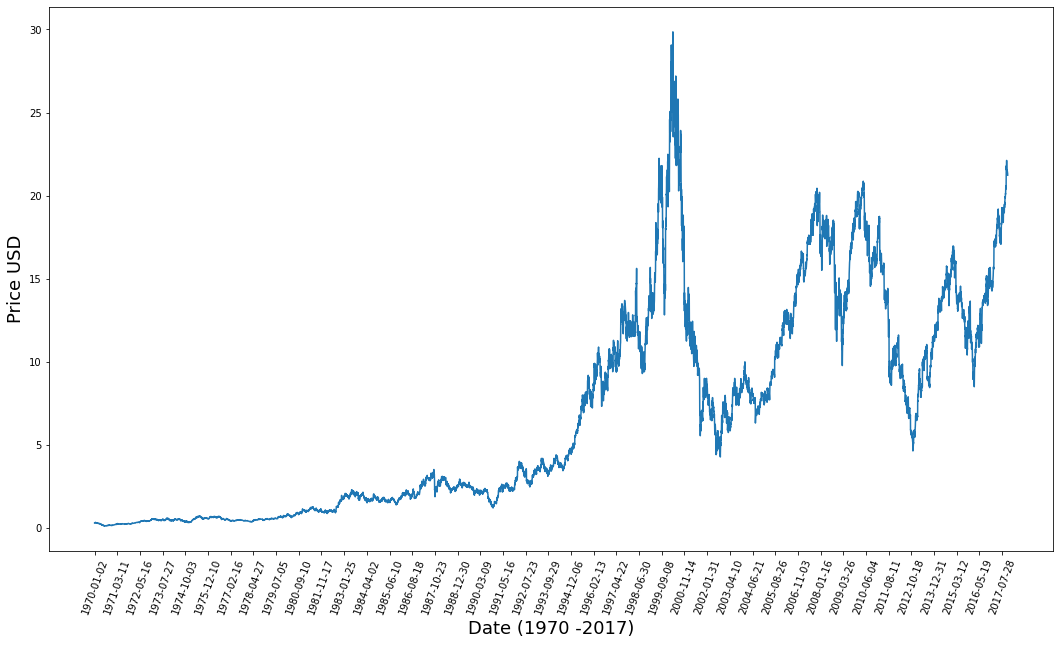

In [0]:
plt.figure(figsize = (18,10))
plt.plot(range(df.shape[0]),(df['Close']))
plt.xticks(range(0,df.shape[0],300),df['Date'].loc[::300],rotation=70)
plt.xlabel('Date (1970 -2017)',fontsize=18)
plt.ylabel('Price USD',fontsize=18)
plt.show()

In [0]:
df_comp.tail()

,Open,High,Low,Close
Date,,,,
2017-11-06,21.47,21.53,21.38,21.44
2017-11-07,21.47,21.47,21.32,21.38
2017-11-08,21.34,21.47,21.24,21.42
2017-11-09,21.27,21.40,21.15,21.34
2017-11-10,21.25,21.31,21.14,21.23


In [0]:
df_comp.head()

,Open,High,Low,Close
Date,,,,
1970-01-02,0.30627,0.30627,0.30627,0.30627
1970-01-05,0.30627,0.31768,0.30627,0.31385
1970-01-06,0.31385,0.31385,0.30996,0.30996
1970-01-07,0.31385,0.31385,0.31385,0.31385
1970-01-08,0.31385,0.31768,0.31385,0.31385


Splitting_data into trainign and test 

plot the QQ plot 

In [0]:
import scipy.stats
import pylab


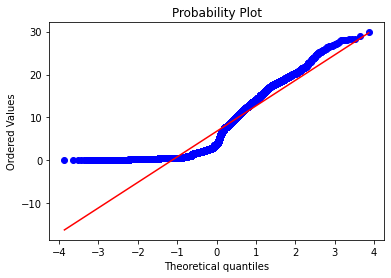

In [0]:
scipy.stats.probplot(df_comp.Close, plot=pylab)
pylab.show()

In [0]:
import pandas as pd 
import numpy as np
import seaborn as sns 
import scipy.stats as scs
import statsmodels.api as sm
import statsmodels.tsa.api as smt

create log returns


In [0]:
logRtn_df = df_comp.copy()


In [0]:
logRtn_df = logRtn_df.loc[:,['Close']]

In [0]:
logRtn_df['simple_rtn'] = df.Close.pct_change()
logRtn_df['log_rtn'] = np.log(logRtn_df.Close/logRtn_df.Close.shift(1))

In [0]:
logRtn_df.head()

,Close,simple_rtn,log_rtn
Date,,,
1970-01-02,0.30627,NaN,NaN
1970-01-05,0.31385,NaN,0.024448
1970-01-06,0.30996,NaN,-0.012472
1970-01-07,0.31385,NaN,0.012472
1970-01-08,0.31385,NaN,0.000000


In [0]:
logRtn_df.dropna(how='any')

,Close,simple_rtn,log_rtn
Date,,,


NOn-Gaussian distribution of returns


In [0]:
r_range = np.linspace(min(logRtn_df.log_rtn), max(logRtn_df.log_rtn), num=1000)
mu = logRtn_df.log_rtn.mean()
sigma = logRtn_df.log_rtn.std()
norm_pdf = scs.norm.pdf(r_range, loc=mu, scale=sigma)

/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:899: RuntimeWarning: invalid value encountered in greater_equal
  return (a <= x) & (x <= b)
/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:899: RuntimeWarning: invalid value encountered in less_equal
  return (a <= x) & (x <= b)


In [0]:
import matplotlib.pyplot as plt
import warnings

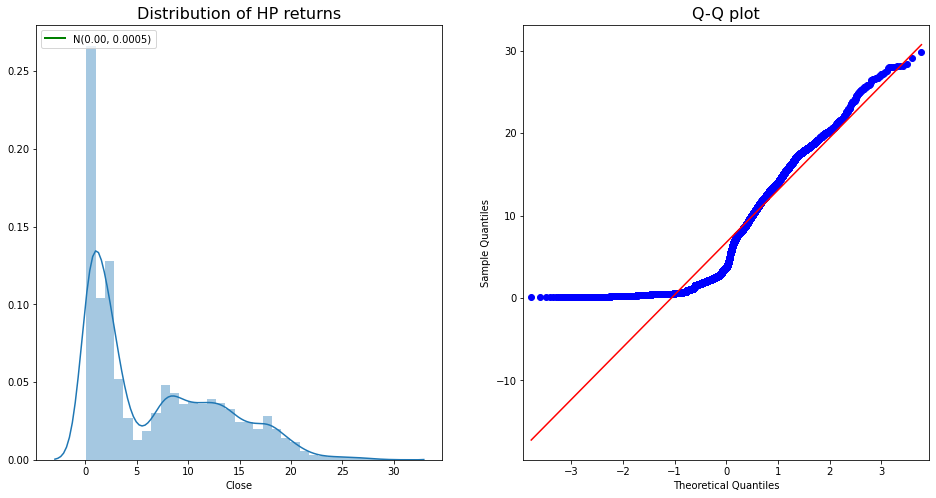

In [0]:
fig, ax = plt.subplots(1, 2, figsize=(16, 8))
# histogram
sns.distplot(logRtn_df.Close, kde=True, norm_hist=True, ax=ax[0])                                    
ax[0].set_title('Distribution of HP returns', fontsize=16)                                                    
ax[0].plot(r_range, norm_pdf, 'g', lw=2, 
           label=f'N({mu:.2f}, {sigma**2:.4f})')
ax[0].legend(loc='upper left');

# Q-Q plot
qq = sm.qqplot(logRtn_df.Close, line='s', ax=ax[1])
ax[1].set_title('Q-Q plot', fontsize = 16)

#plt.tight_layout()
# plt.savefig('images/ch1_im10.png')
plt.show()

## Identify Outliers

In [0]:
logRtn_df['simple_rtn'] = logRtn_df.Close.pct_change()


In [0]:
logRtn_df.head()

,Close,simple_rtn,log_rtn
Date,,,
1970-01-02,0.30627,NaN,NaN
1970-01-05,0.31385,0.024749,0.024448
1970-01-06,0.30996,-0.012394,-0.012472
1970-01-07,0.31385,0.012550,0.012472
1970-01-08,0.31385,0.000000,0.000000


In [0]:
df_rolling = logRtn_df[['simple_rtn']].rolling(window=21) \
                               .agg(['mean', 'std'])
df_rolling.columns = df_rolling.columns.droplevel()

In [0]:
df_outliers = logRtn_df.join(df_rolling)

In [0]:
def indentify_outliers(row, n_sigmas=3):
  x = row['simple_rtn']
  mu = row['mean']
  sigma = row['std']
  if (x > mu + 3 * sigma) | (x < mu - 3 * sigma):
    return 1
  else:
      return 0

In [0]:
df_outliers['outlier'] = df_outliers.apply(indentify_outliers, 
                                           axis=1)
outliers = df_outliers.loc[df_outliers['outlier'] == 1, 
                           ['simple_rtn']]

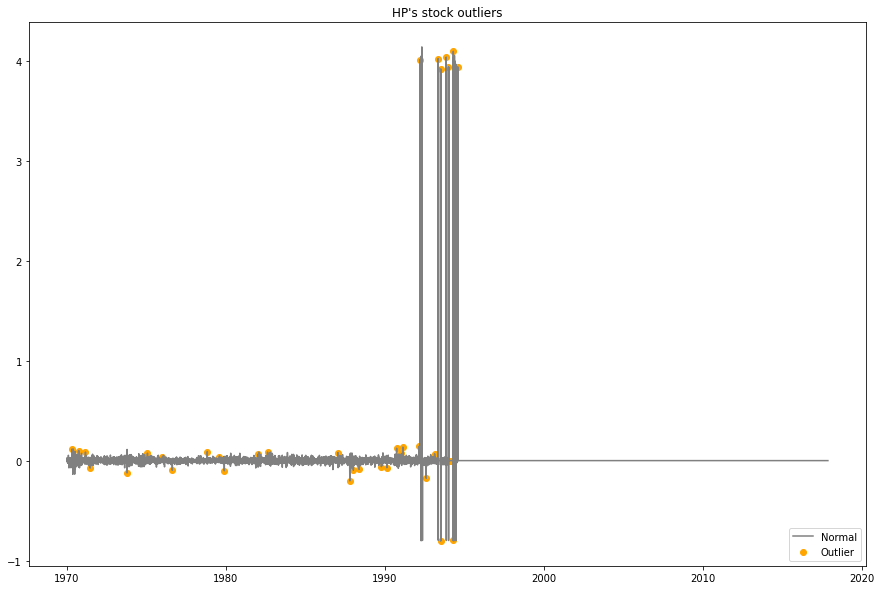

In [0]:
fig, ax = plt.subplots(figsize=(15,10))

ax.plot(df_outliers.index, df_outliers.simple_rtn, 
        color='gray', label='Normal')
ax.scatter(outliers.index, outliers.simple_rtn, 
           color='orange', label='Outlier')
ax.set_title("HP's stock outliers")
ax.legend(loc='lower right')

# plt.tight_layout()
#plt.savefig('/P2/images/ch1_im9.png')
plt.show()

In [0]:
print(logRtn_df['Close'].quantile(0.50)) 
print(logRtn_df['Close'].quantile(0.95)) 
logRtn_df['Close'] = np.where(logRtn_df['Close'] > 3.7704, 18.5257, logRtn_df['Close'])
df.describe()

11.14615
18.5257


,Open,High,Low,Close
count,12075.000000,12075.000000,12075.000000,12075.000000
mean,6.735977,6.834001,6.644309,6.740256
std,6.349568,6.444463,6.261201,6.354457
min,0.118670,0.118670,0.114820,0.114820
25%,1.056300,1.071800,1.044900,1.056300
50%,3.755000,3.793100,3.712800,3.751100
75%,11.654500,11.856500,11.482000,11.664000
max,29.328000,29.857000,28.062000,29.857000


In [0]:
Printing Summary statistics of log returns


In [0]:
df_comp = df.copy()

In [0]:
df_comp

,Date,Open,High,Low,Close
0,1970-01-02,0.30627,0.30627,0.30627,0.30627
1,1970-01-05,0.30627,0.31768,0.30627,0.31385
2,1970-01-06,0.31385,0.31385,0.30996,0.30996
3,1970-01-07,0.31385,0.31385,0.31385,0.31385
4,1970-01-08,0.31385,0.31768,0.31385,0.31385
...,...,...,...,...,...
12070,2017-11-06,21.47000,21.53000,21.38000,21.44000
12071,2017-11-07,21.47000,21.47000,21.32000,21.38000
12072,2017-11-08,21.34000,21.47000,21.24000,21.42000
12073,2017-11-09,21.27000,21.40000,21.15000,21.34000


In [0]:
df_comp.std()


Open     6.349568
High     6.444463
Low      6.261201
Close    6.354457
dtype: float64

In [0]:
df_comp.skew()

Open     0.774299
High     0.779416
Low      0.769638
Close    0.774885
dtype: float64

In [0]:
df_comp.kurtosis()

Open    -0.492549
High    -0.461147
Low     -0.519389
Close   -0.489050
dtype: float64

In [0]:
jb_test = scs.jarque_bera(df.log_rtn.values)

print('---------- Descriptive Statistics ----------')
print('Range of dates:', min(df.index.date), '-', max(df.index.date))
print('Number of observations:', df.shape[0])
print(f'Mean: {df.log_rtn.mean():.4f}')
print(f'Median: {df.log_rtn.median():.4f}')
print(f'Min: {df.log_rtn.min():.4f}')
print(f'Max: {df.log_rtn.max():.4f}')
print(f'Standard Deviation: {df.log_rtn.std():.4f}')
print(f'Skewness: {df.log_rtn.skew():.4f}')
print(f'Kurtosis: {df.log_rtn.kurtosis():.4f}') 
print(f'Jarque-Bera statistic: {jb_test[0]:.2f} with p-value: {jb_test[1]:.2f}')

In [0]:
jb_test = scs.jarque_bera(logRtn_df.values)
df_comp

,Date,Open,High,Low,Close
0,1970-01-02,0.30627,0.30627,0.30627,0.30627
1,1970-01-05,0.30627,0.31768,0.30627,0.31385
2,1970-01-06,0.31385,0.31385,0.30996,0.30996
3,1970-01-07,0.31385,0.31385,0.31385,0.31385
4,1970-01-08,0.31385,0.31768,0.31385,0.31385
...,...,...,...,...,...
12070,2017-11-06,21.47000,21.53000,21.38000,21.44000
12071,2017-11-07,21.47000,21.47000,21.32000,21.38000
12072,2017-11-08,21.34000,21.47000,21.24000,21.42000
12073,2017-11-09,21.27000,21.40000,21.15000,21.34000


In [0]:

logRtn_df.Close.std()

6.354456863011304

In [0]:
print('_____________summary statistics____________')
print(f'Standard Deviation: {logRtn_df.Close.std():.4f}')
print(f'Standard Deviation of log returns: {logRtn_df.log_rtn.std():.4f}')
print(f'Skewness: {logRtn_df.log_rtn.skew():.4f}')
print(f'Skewness of close price: {logRtn_df.Close.skew():.4f}')
print(f'Kurtosis: {logRtn_df.log_rtn.kurtosis():.4f}')
print(f'Kurtosis of close: {logRtn_df.Close.kurtosis():.4f}')
print(f'Standard Deviation: {logRtn_df.Close.std():.4f}')

_____________summary statistics____________
Standard Deviation: 6.3545
Standard Deviation of log returns: 0.0231
Skewness: -0.3095
Skewness of close price: 0.7749
Kurtosis: 6.9695
Kurtosis of close: -0.4890
Standard Deviation: 6.3545


In [0]:
jb_test = scs.jarque_bera(df_comp.Close.values)

(12486, 4)